# Actividad
- **Equipo:** 3
- **Nombres / Matriculas**: 
  - Armando de Jesús Cerda de la Rosa / A01570376
  - Eduardo Maldonado Guzmán / A00832361
  - Nicolás Herrera Hernández / A01114972
  - Saul Orozco / A00831554


# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/SemanaTecAnalitica/

/gdrive/MyDrive/SemanaTecAnalitica


In [ ]:
%cd arte-analitica

/gdrive/MyDrive/SemanaTecAnalitica/arte-analitica


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
presion = pd.read_csv('data/presion.csv', )
presion.head()

,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


In [ ]:
sns.set_palette("Greens_r")

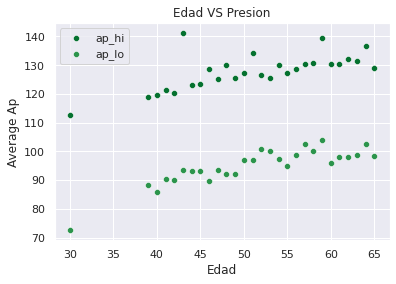

In [ ]:
# Ambas
sns.scatterplot(data = presion, x='edad', y='Average of ap_hi')
sns.scatterplot(data = presion, x='edad', y='Average of ap_lo').set(title='Edad VS Presion', xlabel='Edad', ylabel='Average Ap')
plt.legend(labels=["ap_hi", "ap_lo"])

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr

# We should be splitting data in train and test

In [ ]:
# alta
X = presion[['edad']]
y = presion['Average of ap_hi']

In [ ]:
modelA = LinearRegression()
modelA.fit(X, y)
print('a: ', modelA.coef_)
print('b: ', modelA.intercept_)
print('Rsquared: ', modelA.score(X, y))
print(f'{pearsonr(modelA.predict(X),y)[0] :.20f}', f'{pearsonr(modelA.predict(X),y)[1] :.20f}') # (Pearson’s correlation coefficient, p-value)

a:  [0.47769703]
b:  103.39697409643658
Rsquared:  0.4590368035910293
0.67752254840044201512 0.00007477720811541447


In [ ]:
# baja
X = presion[['edad']]
y = presion['Average of ap_lo']

In [ ]:
modelB = LinearRegression() 
modelB.fit(X, y)
print('a: ', modelB.coef_)
print('b: ', modelB.intercept_)
print('Rsquared: ', modelB.score(X, y))
print(f'{pearsonr(modelB.predict(X),y)[0] :.20f}', f'{pearsonr(modelB.predict(X),y)[1] :.20f}') # (Pearson’s correlation coefficient, p-value)

a:  [0.60898106]
b:  63.726200409422745
Rsquared:  0.7129328807839572
0.84435352831853383027 0.00000001627378339693


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

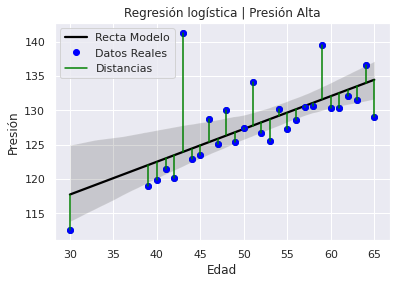

In [ ]:
# alta
X = presion[['edad']]
y = presion['Average of ap_hi']
ax = sns.regplot(x = X, y = y, data=presion,
                  line_kws={"color": "black"}).set(title='Regresión logística | Presión Alta', xlabel='Edad', ylabel='Presión')

x = presion['edad'].to_numpy()
plt.plot(x,y, 'o', color ='blue')
plt.plot(np.vstack([x,x]), np.vstack([y, modelA.predict(x[:, np.newaxis])]), color="green")
plt.legend(labels=["Recta Modelo", "Datos Reales", "Distancias"])


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

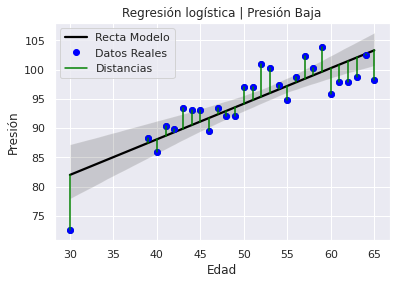

In [ ]:
# baja
X = presion[['edad']]
y = presion['Average of ap_lo']
ax = sns.regplot(x = X, y = y, data=presion,
                  line_kws={"color": "black"}).set(title='Regresión logística | Presión Baja', xlabel='Edad', ylabel='Presión')

x = presion['edad'].to_numpy()
plt.plot(x,y, 'o', color ='blue')
plt.plot(np.vstack([x,x]), np.vstack([y, modelB.predict(x[:, np.newaxis])]), color="green")
plt.legend(labels=["Recta Modelo", "Datos Reales", "Distancias"])


5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presionLo(edad):
   return modelB.predict(pd.DataFrame({'x': [edad],}))[0]

presionLo(edad_calcular)

110.00876081923336

In [ ]:
def presionHi(edad):
     return modelA.predict(pd.DataFrame({'x': [edad],}))[0] 

presionHi(edad_calcular)

139.70194835946518

6. Conclusiones 

Armando - Concluyo que nuestro modelo de presión baja se ajusta mejor a los datos que el modelo de presión alta, considerando el RSquared Value de ambos modelos. Viendo la recta, veo que hay más datos de presión alta que podrían considerarse "outliers", por lo alejado que están de esta. Los datos de presión más baja están más cercanos al modelo. Lo que también noto es que la 
edad está más correlacionada a la presión alta que a la presión baja basándonos en el coeficiente de pearson. Pero, la edad tiene un impacto significativo en ambas presiones, de acuerdo al p-value encontrado de cada modelo. 

Eduardo - Fue relativamente sencillo la ejecución de las tareas de presión arterial, principalmente lo que hicimos fueron dos modelos de regresión líneal, uno para presión alta, y otro para presión baja. El modelo que se ajustó con mayor presición fue el de presión alta. Para tener resultados más precisos, sería necesario contar con más datos, porque solo contamos con 24. Podemos concluir que entre mayor sea la edad, mayor será la probabilidad de tener presión alta

Nicolás - analizando nuestro coeficiente de determinación r^2 podemos concluir que el modelo con mejor ajuste es de la presión arterial baja con respecto a la variable de edad. Tambien se observa como el modelo de presión arterial baja tiene un mayor coeficiente de correlación nos indica que hay una mayor dependencia lineal entre las variables de presion baja y edad.

Saul- como pudimos observar en las graficas se nos arrojaron dos proyecciones para las distintas presiones, alta y baja en la que notamos un ajuste mejor en la presion baja lo cual hace los datos de la presion alta un poco menos fiables al no ser tan exactos sin embargo son suficientes para hacer los analisis necesarios a los clientes puesto que conociendo su presion arterial podriamos determinar mejor su estado de salud y ponerle un precio al servicio en base a eso

#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
insurance = pd.read_csv('data/insurance.csv', )
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
insurance['smoker'] = insurance['smoker'].replace(to_replace ="yes",value =1)\
                                         .replace(to_replace ="no", value =0)

insurance['region'] = insurance['region'].replace(to_replace ="northeast",value =0)\
                                         .replace(to_replace ="southeast", value =1)\
                                         .replace(to_replace ="southwest", value =2)\
                                         .replace(to_replace ="northwest", value =3)

insurance['sex'] = insurance['sex'].replace(to_replace ="male",value =0)\
                                   .replace(to_replace ="female", value =1)

In [ ]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,0,6406.41070
9,60,1,25.840,0,0,3,28923.13692


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>




In [ ]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.486547,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010



<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

[Text(0.5, 1.0, 'Correlation Heatmap | Insurance Dataset')]

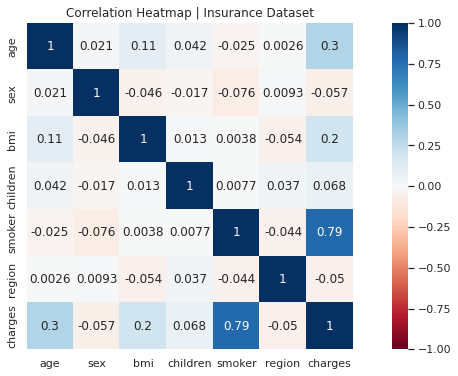

In [ ]:
insurance_corr = insurance.corr()
plt.figure(figsize = (14,6))
sns.heatmap(data=insurance_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot = True, square = True).set(title='Correlation Heatmap | Insurance Dataset')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Armando - El heatmap nos muestra la correlación de cada variable contra las otras variables en el dataset, lo que cumple con el objetivo de la pregunta. ¿Qué encontramos? Lo que se encuentra es que hay una correlación fuerte la variable fumador y costo, las demás correlaciones son bajas o negativas. Las otras correlaciones que no son tan bajas (pensando en cercanas a 0 o negativas) son edad vs costos y bmi vs costos.

Eduardo. Al obtener los datos de la correlación podemos ver que variables se relacionan entre sí (dependen una de otra), en este heatmap, podemos ver visualmente la correlación, entre más azul, mayor es la relación entre ciertas variables. En ese sentido, las variables que más correlación tienen es la de variable "charges" con "smoker" y la que menos tiene correlación es la de "sex" con "charges".

Saul:  La grafica nos arroja datos que considero sumamente acertados, es cierto que los factores de riesgo mas influyentes en la salud de alguien son los habitos como el tabaco o comer con desmedida provocando enfermedades como la obesidad. Todo esto son datos ya conocidos pero representados graficamente donde podemos observar con detalle como afecta cada factor a distintos tipos de personas.  Nos ayudara a identificar la poblacion mas vulnerable y por consiguiente a quienes mas se les cobrara por el servicio de seguro

Nicolás: Se puede observar desde la correlación de los datos como las variables de fumar, edad y bmi, en ese orden, son las más correlacionadas con los costos de seguro, sin embargo al estar cercanas al cero las variables aparte de los fumadores se pueden ignorar.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
insurance.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Edad vs Costo
ln = LinearRegression()

ln.fit(insurance[['age']], insurance['charges'])
print('Edad vs Costo')
print('beta_0: ', ln.intercept_)
print('beta_1: ', ln.coef_)
print('Score: ', ln.score(insurance[['age']], insurance['charges']), '\n')

# BMI vs Costo
ln1 = LinearRegression()

ln1.fit(insurance[['bmi']], insurance['charges'])
print('BMI vs Costo')
print('beta_0: ', ln1.intercept_)
print('beta_1: ', ln1.coef_)
print('Score: ', ln1.score(insurance[['bmi']], insurance['charges']), '\n')


# Niños vs Costo
ln2 = LinearRegression()

ln2.fit(insurance[['children']], insurance['charges'])
print('Niños vs Costo')
print('beta_0: ', ln2.intercept_)
print('beta_1: ', ln2.coef_)
print('Score: ', ln2.score(insurance[['children']], insurance['charges']), '\n')

# Fumar vs Costo
lnF = LinearRegression()

lnF.fit(insurance[['smoker']], insurance['charges'])
print('Fumar vs Costo')
print('beta_0: ', lnF.intercept_)
print('beta_1: ', lnF.coef_)
print('Score: ', lnF.score(insurance[['smoker']], insurance['charges']))

Edad vs Costo
beta_0:  3165.885006063021
beta_1:  [257.72261867]
Score:  0.08940589967885804 

BMI vs Costo
beta_0:  1192.937208961148
beta_1:  [393.8730308]
Score:  0.03933913991786275 

Niños vs Costo
beta_0:  12522.495549644098
beta_1:  [683.08938248]
Score:  0.004623758854459203 

Fumar vs Costo
beta_0:  8434.2682978562
beta_1:  [23615.96353368]
Score:  0.6197648148218988


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

- Fumar
- Edad
- BMI
- Niños

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
ln3 = LinearRegression()

ln3.fit(insurance[['age', 'bmi']], insurance['charges'])
print('Edad y BMI')
print('beta_0: ', ln3.intercept_)
print('betas: ', ln3.coef_)
print('Score: ', ln3.score(insurance[['age', 'bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'bmi']], insurance['charges'], ln3), '\n')


ln4 = LinearRegression()

ln4.fit(insurance[['age','children']], insurance['charges'])
print('Edad y Niños')
print('beta_0: ', ln4.intercept_)
print('betas: ', ln4.coef_)
print('Score: ', ln4.score(insurance[['age', 'children']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'children']], insurance['charges'], ln4), '\n')


ln5 = LinearRegression()

ln5.fit(insurance[['children','bmi']], insurance['charges'])
print('Niños y BMI')
print('beta_0: ', ln5.intercept_)
print('betas: ', ln5.coef_)
print('Score: ', ln5.score(insurance[['children', 'bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['children', 'bmi']], insurance['charges'], ln5), '\n')

ln6 = LinearRegression()

ln6.fit(insurance[['age','children','bmi']], insurance['charges'])
print('Edad, Niños y BMI')
print('beta_0: ', ln6.intercept_)
print('betas: ', ln6.coef_)
print('Score: ', ln6.score(insurance[['age', 'children','bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'children','bmi']], insurance['charges'], ln6), '\n')


ln7 = LinearRegression()

ln7.fit(insurance[['age','smoker','bmi']], insurance['charges'])
print('Edad, Fumar y BMI')
print('beta_0: ', ln7.intercept_)
print('betas: ', ln7.coef_)
print('Score: ', ln7.score(insurance[['age', 'smoker','bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'smoker','bmi']], insurance['charges'], ln7), '\n')

Edad y BMI
beta_0:  -6424.804612240765
betas:  [241.9307779  332.96509081]
Score:  0.11718338606939949
Score ajustado: 0.11586081436313644 

Edad y Niños
beta_0:  2636.0417416124474
betas:  [255.69471256 556.52710886]
Score:  0.09246947629807356
Score ajustado: 0.09110988000788345 

Niños y BMI
beta_0:  523.5994914397652
betas:  [657.7746999  392.21400059]
Score:  0.043625846244526145
Score ajustado: 0.04219307597672772 

Edad, Niños y BMI
beta_0:  -6916.243347787033
betas:  [239.99447429 542.86465225 332.0833645 ]
Score:  0.12009819576246927
Score ajustado: 0.11811940609776728 

Edad, Fumar y BMI
beta_0:  -11676.83042518781
betas:  [  259.54749155 23823.68449531   322.61513282]
Score:  0.7474771588119513
Score ajustado: 0.7469092663655015 



 7. ¿Cuál modelo es el que nos conviene elegir?

1) Edad, Fumar y BMI, porque tiene el mejor ajuste a los datos según su RSquared.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>


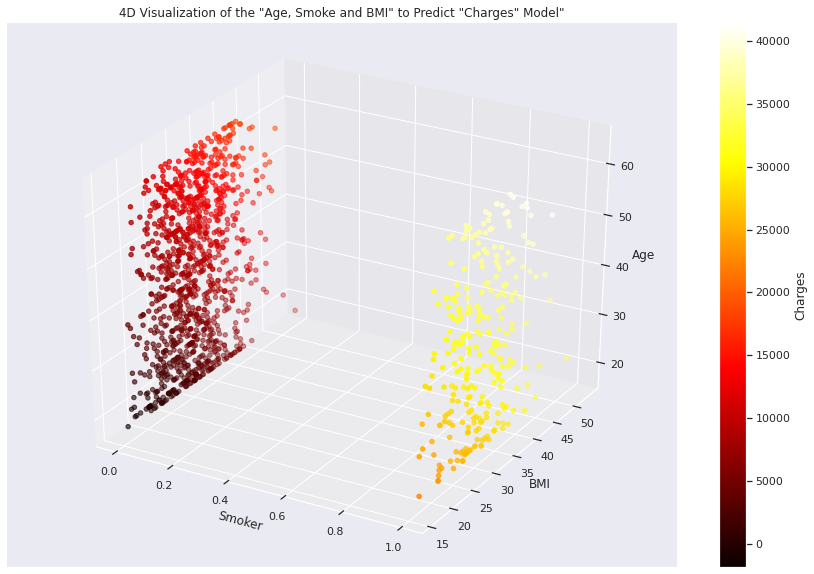

In [ ]:
z = insurance[['age']]
x = insurance[['smoker']]
y = insurance[['bmi']]
c = ln7.predict(insurance[['age','smoker','bmi']])

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('4D Visualization of the "Age, Smoke and BMI" to Predict "Charges" Model"')
ax.set_xlabel('Smoker')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
cbar = plt.colorbar(img)
cbar.set_label('Charges')
plt.show()





<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

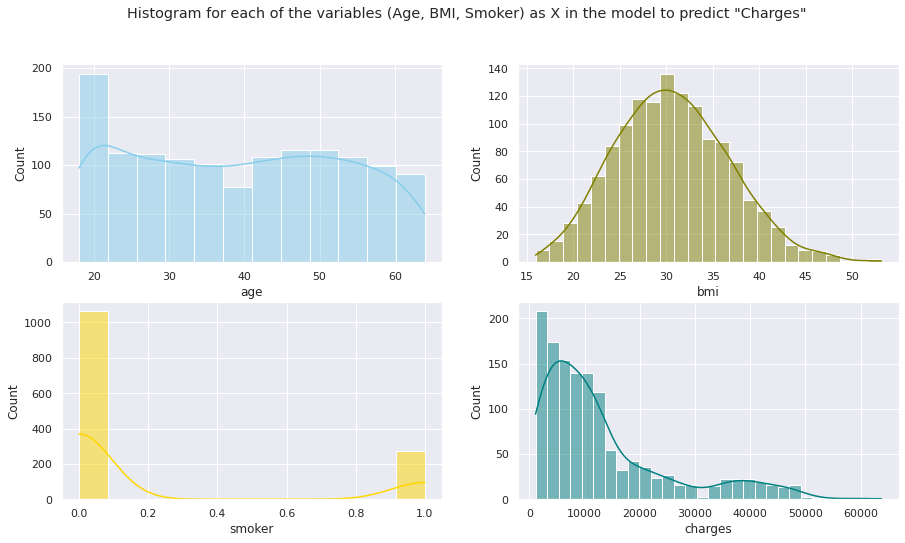

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=insurance, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=insurance, x="bmi", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=insurance, x="smoker", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=insurance, x="charges", kde=True, color="teal", ax=axs[1, 1])
fig.suptitle('Histogram for each of the variables (Age, BMI, Smoker) as X in the model to predict "Charges"')
plt.show()

8. Conclusiones 

Armando - Lo que encontramos gracias al heatmap fue que la variable más correlacionada con los costos era fumar, y luego que edad y BMI tenían cierta correlación. Así que es interesante que las 3 juntas generen el modelo más ajustado a los datos de todos los que probamos, pensando en el RSquared de los modelos. En los modelos sencillos (1 variable X) vimos que el modelo de fumar era el que más se ajustaba a los datos.

Eduardo. Para la obtención de resultados se usó la técnica de modelado estadístico de regresión lineal múltiple, esta se emplea para describir el comportamiento de las variables que se deseen usar, en este caso las variables que se pueden predecir con mayor precisión son: Edad, Fumar y BMI. Por otra parte, también es importante la correlación que hay entre las variables con respecto a los costos, la variable con más correlación resultó ser "fumar". Para mejorar los cálculos realizados sería bueno experimentar con otras técnicas de modelado estadístico, para posteriormente comparar resultados. Podemos concluir que las personas que pagan más son las fumadoras, con alto índice de BMI y de mayor edad.

Saul: La grafica nos arroja los datos de forma comprensible y facil de digerir, aplicando un poco de analisis podemos notar que entre a mas factores de riesgo y mas intensos sean, mas costo se le cobrara al usuario por representar mas posibilidades de presentar dificultades para la aseguradora

Nicolás: Se puede observar desde la correlación de los datos como las variables de fumar, edad y bmi, en ese orden, son las más correlacionadas con los costos de seguro. Al realizar nuestro modelo de regresión lineal no es sorprendente que estas variables tengan el score más alto cuando se compara con los costos en especial los fumadores. En la regresión múltiple se ve claramente como al agrupar las variables más correlacionadas se obtiene el modelo que se ajusta más a nuestra problemática.
